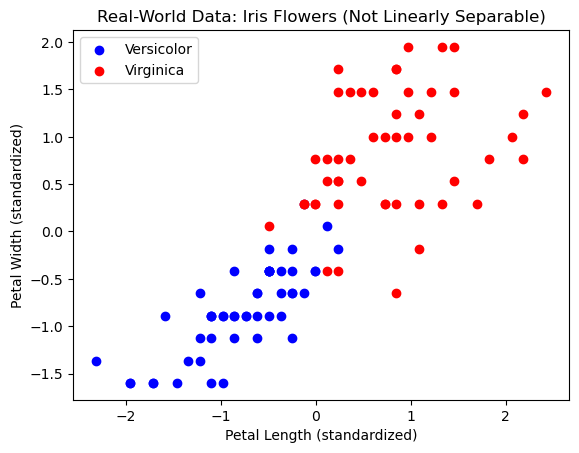

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # all features
y = iris.target

# Select only Versicolor (1) and Virginica (2), and features: Petal length & width (2:4)
X = X[(y == 1) | (y == 2), 2:4]
y = y[(y == 1) | (y == 2)]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Plot original data
plt.figure()
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='red', label='Virginica')
plt.title('Real-World Data: Iris Flowers (Not Linearly Separable)')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.legend()
plt.show()

In [9]:
def plot_decision_boundary(clf, X, y, title):
    """Helper function to plot decision boundaries for classifiers."""
    h = 0.02  # step size for mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class for each point in the mesh
    
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot filled contour
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    #plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    
    # Plot training points
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Versicolor', edgecolors='k')
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='red', label='Virginica', edgecolors='k')
    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.title(title)
    plt.legend()
    plt.show()

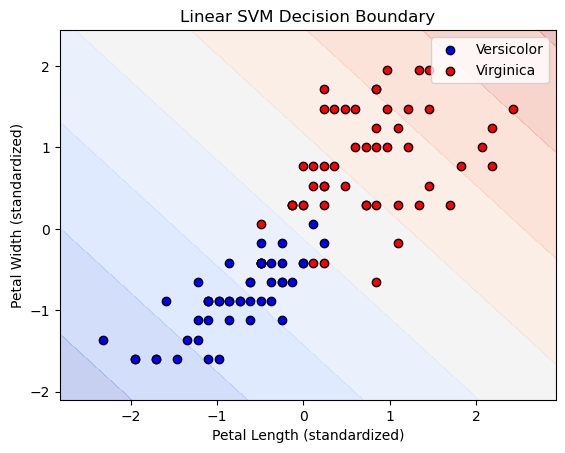

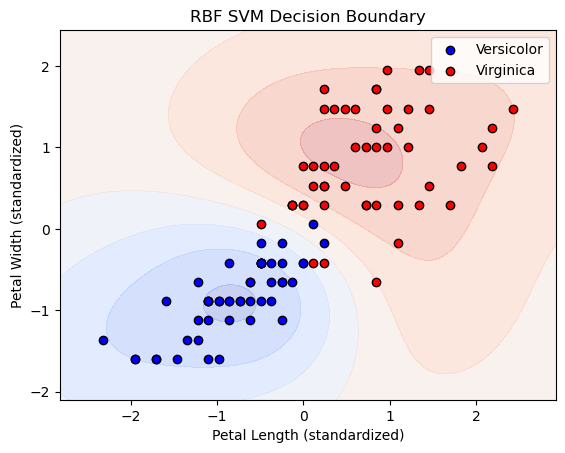

In [11]:
# Linear SVM
clf_linear = SVC(kernel="linear", C=1)
clf_linear.fit(X, y)
plot_decision_boundary(clf_linear, X, y, "Linear SVM Decision Boundary")

# RBF SVM
clf_rbf = SVC(kernel="rbf", C=1, gamma=0.5)
clf_rbf.fit(X, y)
plot_decision_boundary(clf_rbf, X, y, "RBF SVM Decision Boundary")

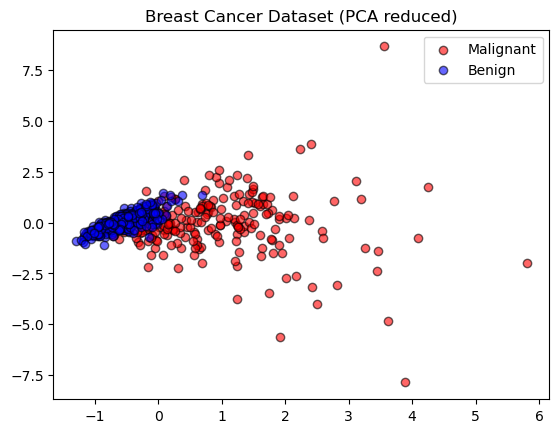

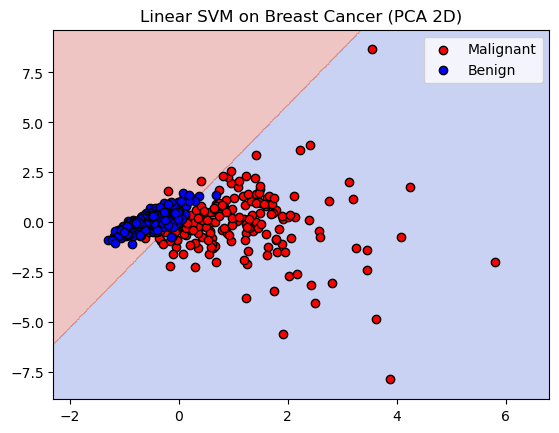

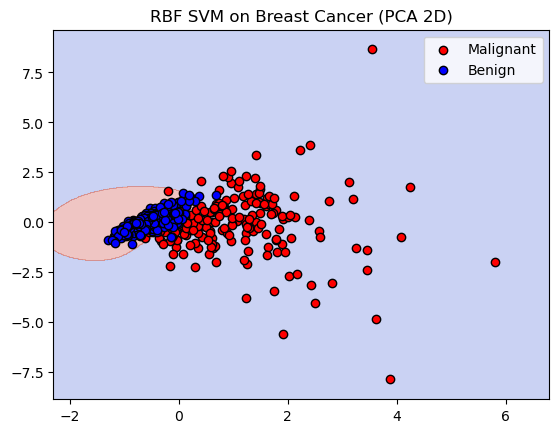

In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# 1. Load and prepare dataset
# -----------------------------
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target   # 0 = malignant, 1 = benign

# Use PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Plot raw data
plt.scatter(X[y==0,0], X[y==0,1], color="red", label="Malignant", alpha=0.6, edgecolors="k")
plt.scatter(X[y==1,0], X[y==1,1], color="blue", label="Benign", alpha=0.6, edgecolors="k")
plt.title("Breast Cancer Dataset (PCA reduced)")
plt.legend()
plt.show()

# -----------------------------
# 2. Helper function
# -----------------------------
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[y==0,0], X[y==0,1], color="red", edgecolors="k", label="Malignant")
    plt.scatter(X[y==1,0], X[y==1,1], color="blue", edgecolors="k", label="Benign")
    plt.title(title)
    plt.legend()
    plt.show()

# -----------------------------
# 3. Train and visualize models
# -----------------------------
clf_linear = SVC(kernel="linear", C=1)
clf_linear.fit(X, y)
plot_decision_boundary(clf_linear, X, y, "Linear SVM on Breast Cancer (PCA 2D)")

clf_rbf = SVC(kernel="rbf", C=1, gamma=0.5)
clf_rbf.fit(X, y)
plot_decision_boundary(clf_rbf, X, y, "RBF SVM on Breast Cancer (PCA 2D)")
